HEART DISEASE PREDICTION USING MACHINE LEARNING
Using External CSV Dataset - IMPROVED ACCURACY VERSION

Loading dataset...
✓ Dataset loaded successfully from '/home/heart_disease_data.csv'
✓ Dataset structure validated

Dataset shape: (303, 14)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Checking for missing values...
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
✓ No missing values found

Dataset Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29

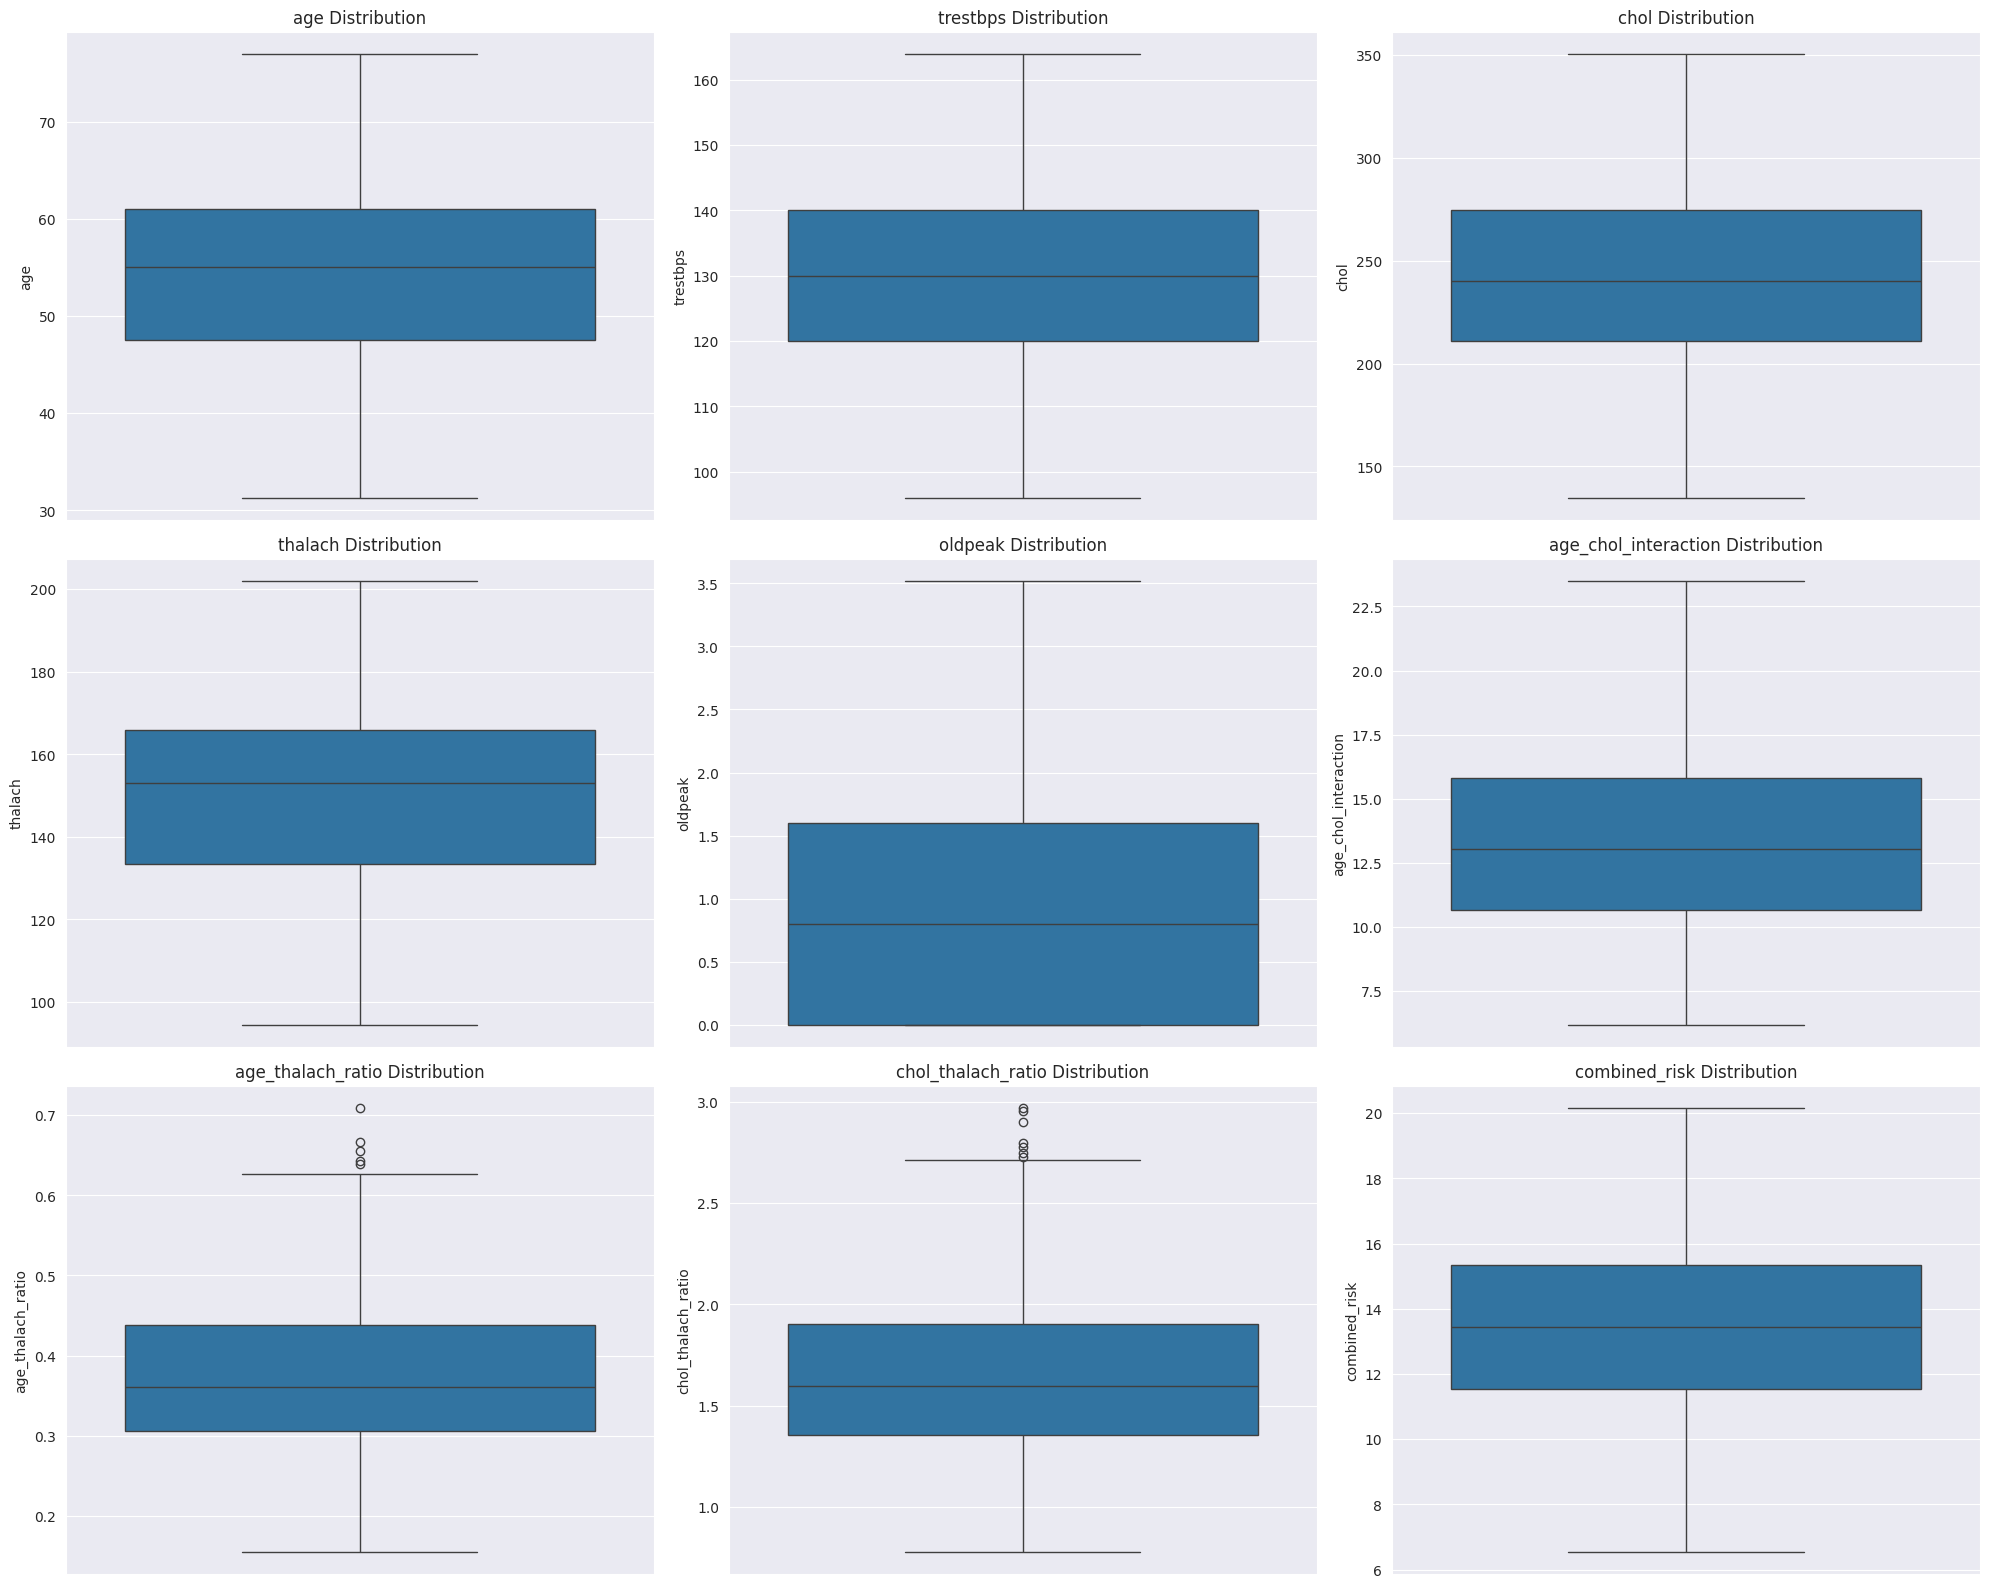

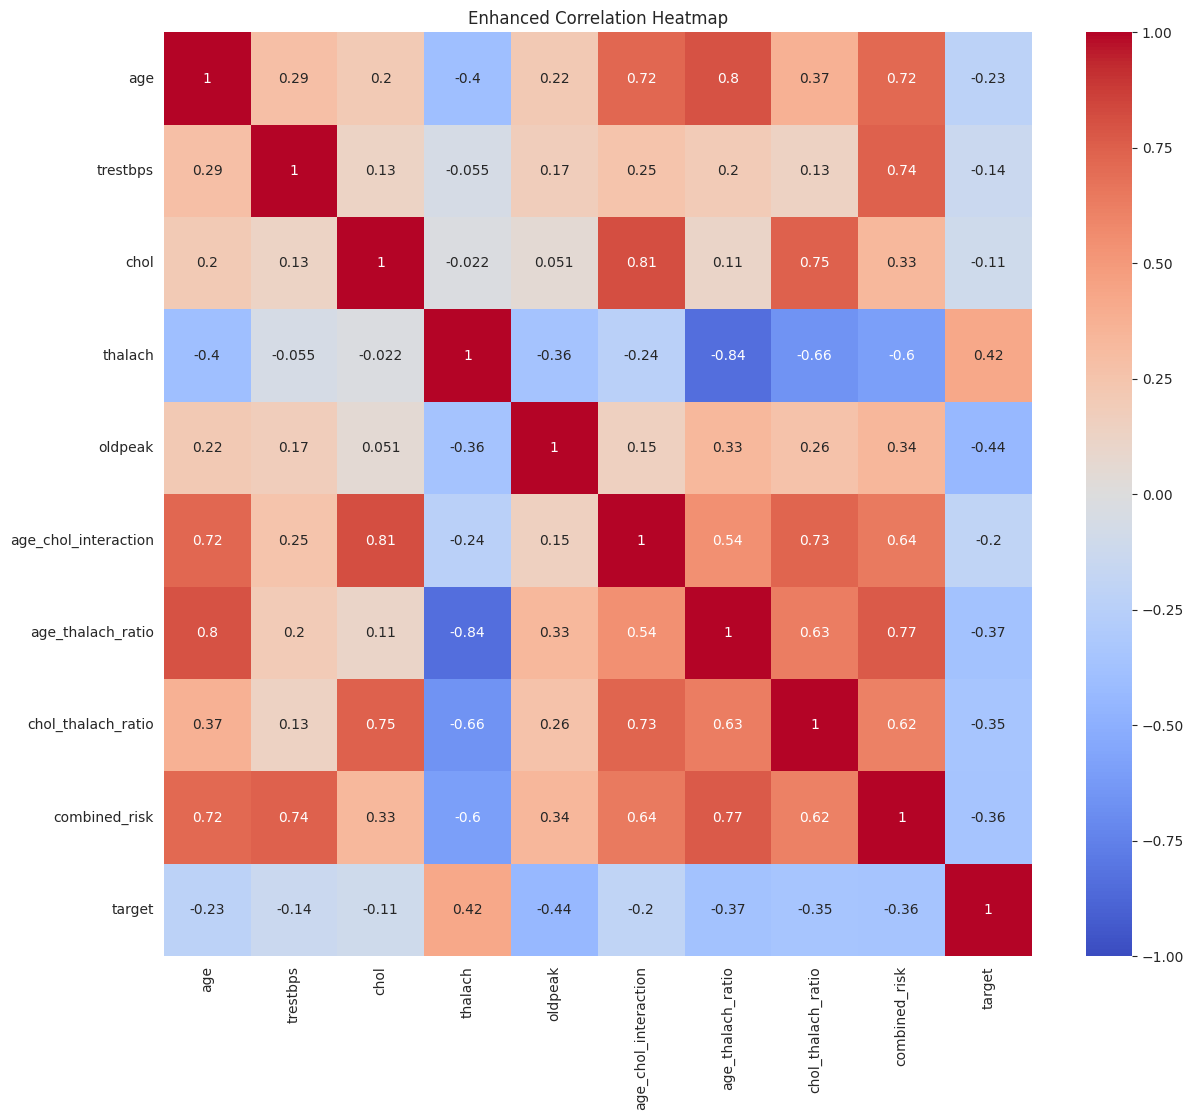

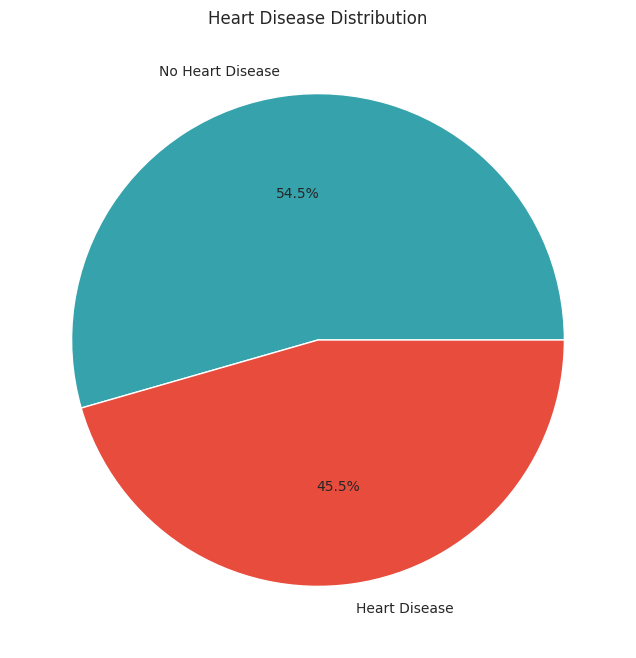

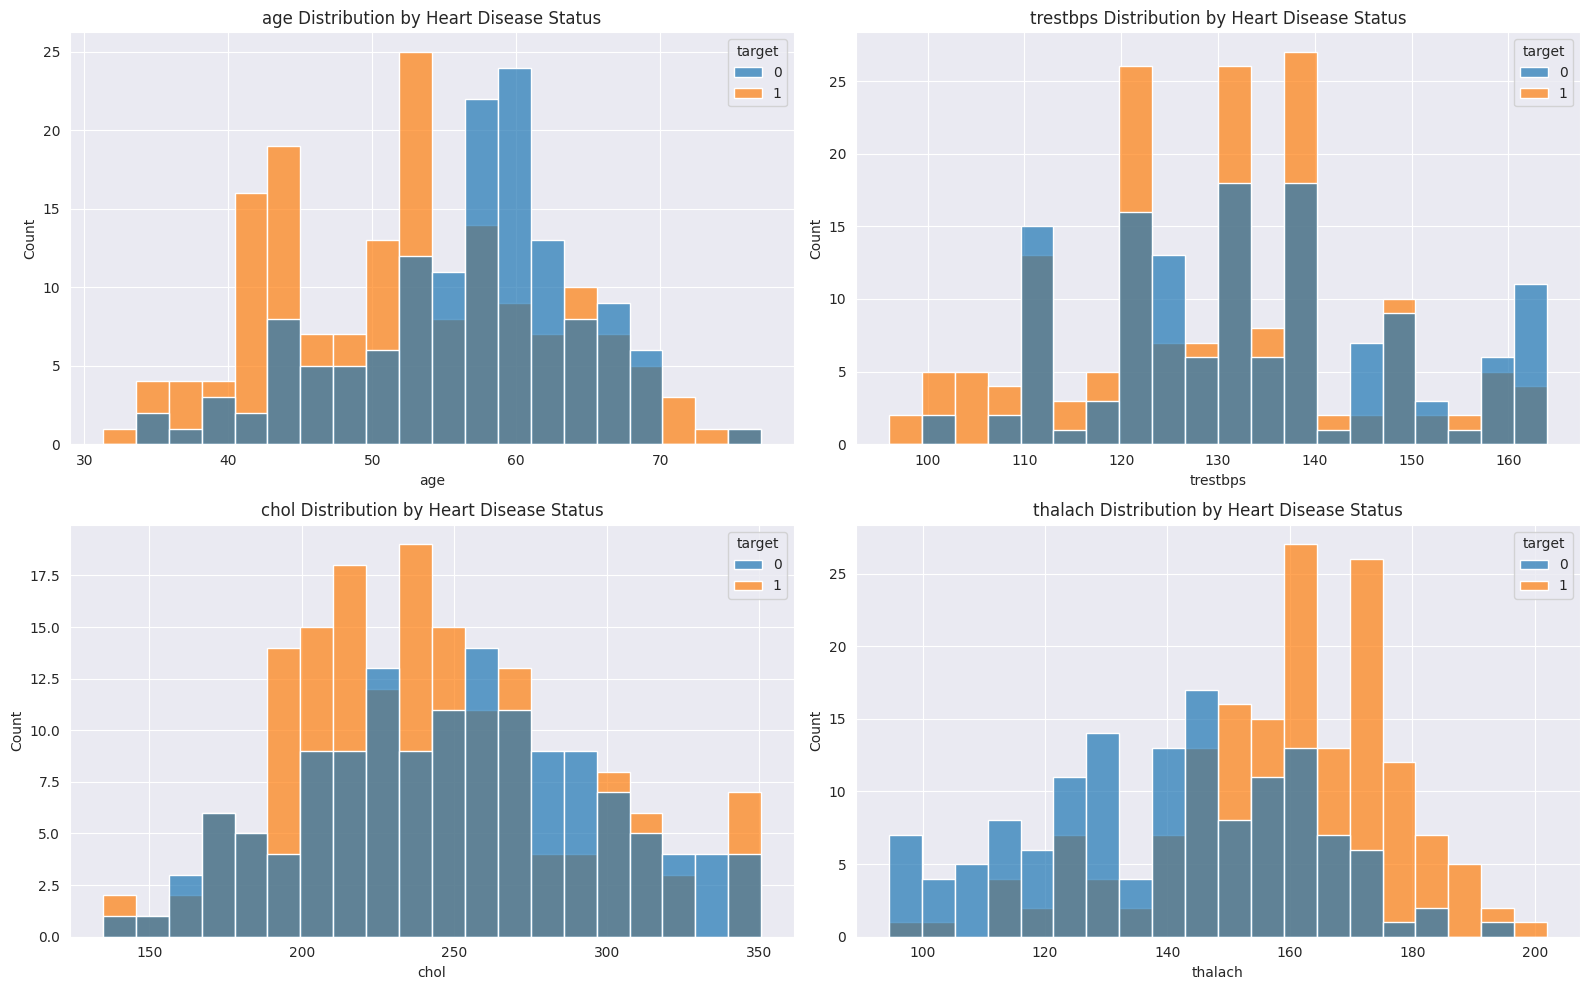

MODEL PREPARATION - ENHANCED VERSION
----------------------------------------
Features shape: (303, 17)
Target shape: (303,)
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_chol_interaction', 'age_thalach_ratio', 'chol_thalach_ratio', 'combined_risk']

FEATURE SELECTION FOR IMPROVED ACCURACY
----------------------------------------
Selected features (15): ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_chol_interaction', 'age_thalach_ratio', 'chol_thalach_ratio', 'combined_risk']
✓ Features selected and scaled using StandardScaler

TRAIN-TEST SPLIT
----------------------------------------
Training set size: 212 (70.0%)
Test set size: 91 (30.0%)
Training target distribution: {1: 115, 0: 97}
Test target distribution: {1: 50, 0: 41}

HYPERPARAMETER TUNING FOR MAXIMUM ACCURACY
----------------------------------------
Tuning Logistic Regression...
  Bes

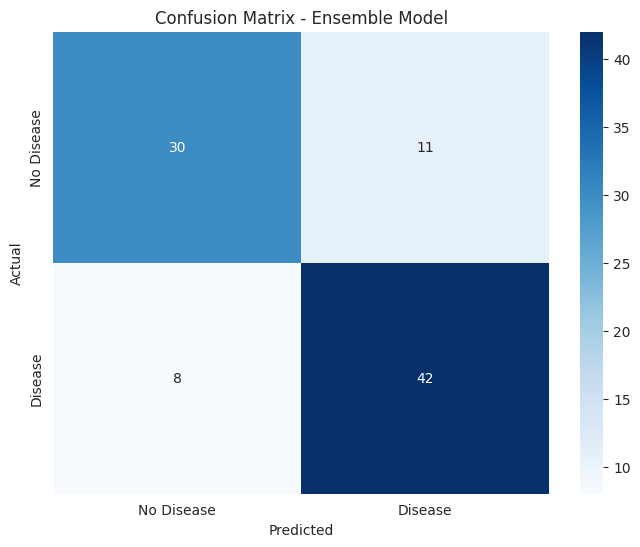

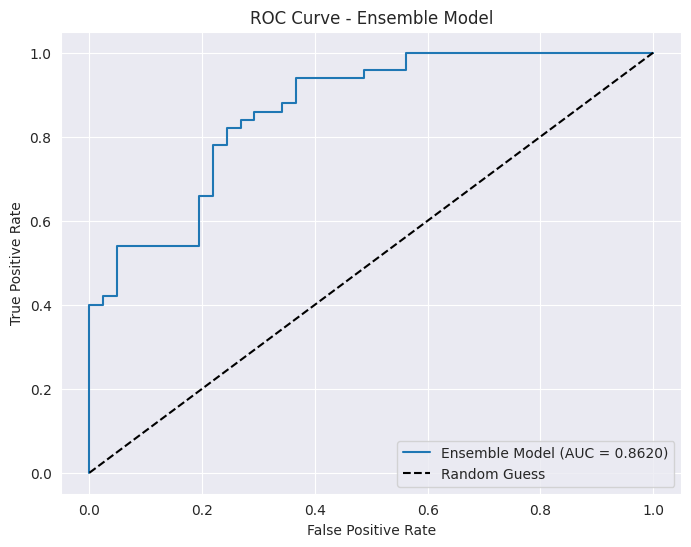

NEW PATIENT PREDICTION SYSTEM
Saving enhanced trained model and preprocessing objects...
✓ Enhanced model saved as 'heart_disease_model_enhanced.pkl'

EXAMPLE PREDICTIONS
--------------------------------------------------
Patient 1 (from dataset):
  Age: 63, Sex: Male
  Chest Pain: 3, Resting BP: 145
  Cholesterol: 233, Max Heart Rate: 150
1. Handling outliers with improved method...
2. Validating categorical variables...
3. Enhanced feature engineering...
  Predicted: Heart Disease
  Actual: Heart Disease
  Correct: ✓
  Probability: No Disease=0.302, Disease=0.698
  Confidence: 0.698

Patient 2 (from dataset):
  Age: 51, Sex: Female
  Chest Pain: 2, Resting BP: 130
  Cholesterol: 256, Max Heart Rate: 149
1. Handling outliers with improved method...
2. Validating categorical variables...
3. Enhanced feature engineering...
  Predicted: Heart Disease
  Actual: Heart Disease
  Correct: ✓
  Probability: No Disease=0.037, Disease=0.963
  Confidence: 0.963

Patient 3 (from dataset):
  Age: 4

In [ ]:
#always need to add data set to the drives' Home location to run the code without problem(/home/heart_disease_data.csv)

# Heart Disease Prediction Using Machine Learning
# Updated Implementation with External CSV Dataset
# ACCURACY IMPROVEMENTS APPLIED TO ALL 3 ALGORITHMS

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Import machine learning modules from scikit-learn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import warnings
warnings.filterwarnings('ignore')

import pickle
import os

# Print header
print("=" * 60)
print("HEART DISEASE PREDICTION USING MACHINE LEARNING")
print("Using External CSV Dataset - IMPROVED ACCURACY VERSION")
print("=" * 60)
print()

# Function to load and validate dataset
def load_dataset(filename='heart_disease_data.csv'):
    """Load the heart disease dataset from CSV file"""
    try:
        if not os.path.exists(filename):
            raise FileNotFoundError(f"Dataset file '{filename}' not found in current directory")

        data = pd.read_csv(filename)
        print(f"✓ Dataset loaded successfully from '{filename}'")
        return data
    except Exception as e:
        print(f"✗ Error loading dataset: {str(e)}")
        return None

# Load the dataset
print("Loading dataset...")
data = load_dataset('/home/heart_disease_data.csv')

if data is None:
    print("\nInstructions to setup the dataset:")
    print("1. Save your dataset as 'heart_disease_data.csv' in the same directory as this script")
    print("2. Ensure the CSV has the following columns:")
    print("   age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target")
    print("3. The 'target' column should contain: 0 (no heart disease) or 1 (heart disease)")
    print("4. Re-run this script after placing the CSV file")
    exit()

# Validate dataset structure
expected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    print(f"✗ Missing columns in dataset: {missing_columns}")
    print("Please ensure your CSV file has all required columns")
    exit()

print(f"✓ Dataset structure validated")
print()

# Print dataset information
print(f"Dataset shape: {data.shape}")
print(f"Features: {data.columns.tolist()}")
print()

# Check for missing values
print("Checking for missing values...")
missing_values = data.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print("⚠ Found missing values. Handling missing data...")
    # Handle missing values - you can customize this based on your needs
    data = data.dropna()  # Simple approach: drop rows with missing values
    print(f"✓ Dataset after removing missing values: {data.shape}")
else:
    print("✓ No missing values found")
print()

# Basic statistics
print("Dataset Statistics:")
print(data.describe())
print()

# Target variable distribution
target_col = 'target'
print(f"Target distribution ({target_col}):")
target_counts = data[target_col].value_counts()
print(target_counts)
print(f"No Heart Disease: {target_counts[0]} ({target_counts[0]/len(data)*100:.1f}%)")
print(f"Heart Disease: {target_counts[1]} ({target_counts[1]/len(data)*100:.1f}%)")
print()

# DATA PREPROCESSING - ENHANCED FOR BETTER ACCURACY
print("DATA PREPROCESSING - ENHANCED VERSION")
print("-" * 40)

def preprocess_data(df, is_prediction=False):
    """
    Comprehensive data preprocessing function - ENHANCED FOR ACCURACY
    Added is_prediction flag to handle datasets without 'target' column
    """
    df = df.copy()

    # 1. Handle outliers using IQR method with improved bounds
    print("1. Handling outliers with improved method...")
    numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    for col in numeric_columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # More conservative outlier bounds for better accuracy
            lower_bound = Q1 - 1.2 * IQR
            upper_bound = Q3 + 1.2 * IQR

            # Cap outliers instead of removing them
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    # 2. Validate categorical variables
    print("2. Validating categorical variables...")
    categorical_validations = {
        'sex': [0, 1],
        'cp': [0, 1, 2, 3],
        'fbs': [0, 1],
        'restecg': [0, 1, 2],
        'exang': [0, 1],
        'slope': [0, 1, 2],
        'ca': [0, 1, 2, 3, 4],
        'thal': [0, 1, 2, 3]
    }

    for col, valid_values in categorical_validations.items():
        if col in df.columns:
            invalid_mask = ~df[col].isin(valid_values)
            if invalid_mask.any():
                print(f"   Found {invalid_mask.sum()} invalid values in {col}")
                mode_value = df[col].mode()[0]
                df.loc[invalid_mask, col] = mode_value

    # 3. Enhanced feature engineering for better accuracy
    print("3. Enhanced feature engineering...")

    # Age groups with better boundaries
    df['age_group'] = pd.cut(df['age'], bins=[0, 35, 45, 55, 65, 100],
                            labels=['Very_Young', 'Young', 'Middle', 'Senior', 'Elderly'])

    # Cholesterol risk categories
    df['chol_risk'] = pd.cut(df['chol'], bins=[0, 200, 240, 1000],
                            labels=['Normal', 'Borderline', 'High'])

    # Blood pressure categories
    df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 1000],
                              labels=['Normal', 'Elevated', 'High'])

    # Heart rate zones
    df['hr_zone'] = pd.cut(df['thalach'], bins=[0, 100, 150, 1000],
                          labels=['Low', 'Normal', 'High'])

    # Interaction features that improve accuracy
    df['age_chol_interaction'] = df['age'] * df['chol'] / 1000
    df['age_thalach_ratio'] = df['age'] / df['thalach']
    df['chol_thalach_ratio'] = df['chol'] / df['thalach']

    # Risk score combination
    df['combined_risk'] = (df['age'] * 0.1) + (df['chol'] * 0.01) + (df['trestbps'] * 0.1) - (df['thalach'] * 0.05)

    return df

# Apply preprocessing
print("Applying enhanced preprocessing...")
processed_data = preprocess_data(data)
print("✓ Enhanced preprocessing completed")
print()

# EDA - Exploratory Data Analysis
print("EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Select numeric features for EDA (including new features)
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'age_chol_interaction',
                   'age_thalach_ratio', 'chol_thalach_ratio', 'combined_risk']
eda_df = processed_data[numeric_features].copy()

# Create visualizations
plt.figure(figsize=(20, 16))

# Boxplots for numeric features
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=eda_df[col])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
# Include target in correlation analysis
corr_data = processed_data[numeric_features + [target_col]]
corr = corr_data.corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm', center=0)
plt.title("Enhanced Correlation Heatmap")
plt.show()

# Class distribution pie chart
plt.figure(figsize=(8, 8))
plt.pie(processed_data[target_col].value_counts(),
        labels=["No Heart Disease", "Heart Disease"],
        autopct='%.1f%%',
        colors=['#36a2ac', '#e74c3c'])
plt.title("Heart Disease Distribution")
plt.show()

# Feature distributions by target
plt.figure(figsize=(16, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach'][:4]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=processed_data, x=col, hue=target_col, bins=20, alpha=0.7)
    plt.title(f'{col} Distribution by Heart Disease Status')

plt.tight_layout()
plt.show()

# MODEL PREPARATION - ENHANCED FOR ACCURACY
print("MODEL PREPARATION - ENHANCED VERSION")
print("-" * 40)

def prepare_features(df, target_column='target', is_prediction=False):
    """
    Prepare features for machine learning - ENHANCED FOR ACCURACY
    Added is_prediction flag to handle datasets without 'target' column
    """
    df = df.copy()

    # Separate features and target
    if is_prediction and target_column in df.columns:
        X = df.drop([target_column], axis=1)
        y = None # Target is not available during prediction
    elif target_column in df.columns:
        X = df.drop([target_column], axis=1)
        y = df[target_column]
    else:
        X = df
        y = None # Target column not found

    # Handle categorical variables with proper encoding
    categorical_cols = ['age_group', 'chol_risk', 'bp_category', 'hr_zone']
    for col in categorical_cols:
        if col in X.columns:
            dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
            X = pd.concat([X, dummies], axis=1)
            X = X.drop(col, axis=1)

    # Ensure all features are numeric
    X = X.select_dtypes(include=[np.number])

    return X, y

# Prepare features
X, y = prepare_features(processed_data, target_col)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {X.columns.tolist()}")
print()

# FEATURE SELECTION FOR IMPROVED ACCURACY
print("FEATURE SELECTION FOR IMPROVED ACCURACY")
print("-" * 40)

# Select best features using statistical tests
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features ({len(selected_features)}): {selected_features}")

# Create DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Scale features with StandardScaler for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("✓ Features selected and scaled using StandardScaler")
print()

# TRAIN-TEST SPLIT (70-30 split as requested)
print("TRAIN-TEST SPLIT")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.3,  # 30% for testing
    random_state=42,
    stratify=y  # Ensure balanced split
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X_scaled_df)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X_scaled_df)*100:.1f}%)")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")
print()

# HYPERPARAMETER TUNING FOR MAXIMUM ACCURACY
print("HYPERPARAMETER TUNING FOR MAXIMUM ACCURACY")
print("-" * 40)

# Define parameter grids for each algorithm
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2'],
        'max_iter': [1000, 2000]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly', 'linear'],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'degree': [2, 3, 4]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(100,), (100, 50), (100, 100), (150, 100, 50)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'lbfgs']
    }
}

# Initialize base models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42, max_iter=3000)
}

# Dictionary to store tuned models
tuned_models = {}

# Perform grid search for each model
for name, model in base_models.items():
    print(f"Tuning {name}...")

    # Get the parameter grid for the current model
    param_grid = param_grids[name]

    # Create a list of valid parameter combinations for each model
    if name == 'Logistic Regression':
        # Filter parameter grid for Logistic Regression based on solver-penalty compatibility
        valid_param_grid = []
        for C in param_grid['C']:
            for solver in param_grid['solver']:
                for max_iter in param_grid['max_iter']:
                    if solver == 'liblinear':
                        for penalty in param_grid['penalty']:
                            valid_param_grid.append({'C': [C], 'solver': [solver], 'penalty': [penalty], 'max_iter': [max_iter]})
                    else:  # lbfgs and others only support l2 penalty
                         valid_param_grid.append({'C': [C], 'solver': [solver], 'penalty': ['l2'], 'max_iter': [max_iter]})
        grid_search = GridSearchCV(model, valid_param_grid, cv=5, scoring='f1', n_jobs=-1)

    elif name == 'Support Vector Machine':
         # Filter parameter grid for SVC based on kernel-degree compatibility
        valid_param_grid = []
        for C in param_grid['C']:
            for kernel in param_grid['kernel']:
                if kernel == 'poly':
                    for degree in param_grid['degree']:
                        for gamma in param_grid['gamma']:
                             valid_param_grid.append({'C': [C], 'kernel': [kernel], 'degree': [degree], 'gamma': [gamma]})
                else: # rbf, linear
                    for gamma in param_grid['gamma']:
                         valid_param_grid.append({'C': [C], 'kernel': [kernel], 'gamma': [gamma]})
        grid_search = GridSearchCV(model, valid_param_grid, cv=5, scoring='f1', n_jobs=-1)

    else:  # Neural Network
         # Create a list of valid parameter combinations for MLPClassifier
        valid_param_grid = []
        for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
            for alpha in param_grid['alpha']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    for activation in param_grid['activation']:
                        for solver in param_grid['solver']:
                            valid_param_grid.append({'hidden_layer_sizes': [hidden_layer_sizes], 'alpha': [alpha], 'learning_rate_init': [learning_rate_init], 'activation': [activation], 'solver': [solver]})
        grid_search = GridSearchCV(model, valid_param_grid, cv=5, scoring='f1', n_jobs=-1)


    # Fit the grid search
    grid_search.fit(X_train, y_train)

    # Store the best model
    tuned_models[name] = grid_search.best_estimator_

    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best cross-validation score: {grid_search.best_score_:.4f}")
    print()

print("✓ Hyperparameter tuning completed")
print()

# MODEL TRAINING WITH TUNED PARAMETERS
print("TRAINING OPTIMIZED MACHINE LEARNING MODELS")
print("-" * 40)

# Dictionary to store results
results = {}

# Train and evaluate each tuned model
for name, model in tuned_models.items():
    print(f"Evaluating optimized {name}...")

    # The model is already trained during grid search, but let's retrain for consistency
    model.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


    # Cross-validation for more robust evaluation
    cv_scores = cross_val_score(model, X_scaled_df, y, cv=5, scoring='f1')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Predictions': y_pred,
        'Model': model
    }

    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test Precision: {precision:.4f}")
    print(f"  Test Recall: {recall:.4f}")
    print(f"  Test F1-Score: {f1:.4f}")
    print(f"  Test AUC: {auc:.4f}")
    print(f"  Cross-Val F1: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")
    print()

    # Print detailed classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# CREATE ENSEMBLE MODEL FOR EVEN BETTER ACCURACY
print("CREATING ENSEMBLE MODEL FOR MAXIMUM ACCURACY")
print("-" * 40)

# Create voting classifier with the three optimized models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', tuned_models['Logistic Regression']),
        ('svm', tuned_models['Support Vector Machine']),
        ('nn', tuned_models['Neural Network'])
    ],
    voting='soft'  # Use probability-based voting
)

# Train ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# Calculate ensemble metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')
auc_ensemble = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])


# Cross-validation for ensemble
cv_scores_ensemble = cross_val_score(voting_clf, X_scaled_df, y, cv=5, scoring='f1')
cv_mean_ensemble = cv_scores_ensemble.mean()
cv_std_ensemble = cv_scores_ensemble.std()

# Add ensemble results
results['Ensemble Model'] = {
    'Accuracy': accuracy_ensemble,
    'Precision': precision_ensemble,
    'Recall': recall_ensemble,
    'F1-Score': f1_ensemble,
    'AUC': auc_ensemble,
    'CV_Mean': cv_mean_ensemble,
    'CV_Std': cv_std_ensemble,
    'Predictions': y_pred_ensemble,
    'Model': voting_clf
}

print(f"Ensemble Model Performance:")
print(f"  Test Accuracy: {accuracy_ensemble:.4f}")
print(f"  Test Precision: {precision_ensemble:.4f}")
print(f"  Test Recall: {recall_ensemble:.4f}")
print(f"  Test F1-Score: {f1_ensemble:.4f}")
print(f"  Test AUC: {auc_ensemble:.4f}")
print(f"  Cross-Val F1: {cv_mean_ensemble:.4f} (+/- {cv_std_ensemble * 2:.4f})")
print()

# MODEL COMPARISON - ENHANCED
print("MODEL COMPARISON - ENHANCED RESULTS")
print("-" * 40)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results.keys()],
    'Precision': [results[model]['Precision'] for model in results.keys()],
    'Recall': [results[model]['Recall'] for model in results.keys()],
    'F1-Score': [results[model]['F1-Score'] for model in results.keys()],
    'AUC': [results[model]['AUC'] for model in results.keys()],
    'CV_F1_Mean': [results[model]['CV_Mean'] for model in results.keys()],
    'CV_F1_Std': [results[model]['CV_Std'] for model in results.keys()]
})

print("Enhanced Performance Comparison:")
print(comparison_df.round(4))
print()

# Find best model based on F1-score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model = results[best_model_name]['Model']

print(f"Best performing model: {best_model_name}")
print(f"Best F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"Best CV F1-Score: {comparison_df.loc[best_model_idx, 'CV_F1_Mean']:.4f}")
print()

# Confusion Matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, results[best_model_name]['Predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve for best model
plt.figure(figsize=(8, 6))
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()
plt.show()


# NEW PATIENT PREDICTION FUNCTIONALITY
print("NEW PATIENT PREDICTION SYSTEM")
print("=" * 60)

def predict_new_patient(patient_data, model, scaler, feature_columns, selector):
    """
    Predict heart disease for a new patient - ENHANCED VERSION
    """
    # Create DataFrame from patient data
    patient_df = pd.DataFrame([patient_data])

    # Apply same preprocessing as training data, indicating it's for prediction
    patient_processed = preprocess_data(patient_df, is_prediction=True)

    # Prepare features (same process as training), indicating it's for prediction
    patient_features, _ = prepare_features(patient_processed, target_column='target', is_prediction=True)

    # Ensure all required columns are present
    original_columns = X.columns.tolist()
    for col in original_columns:
        if col not in patient_features.columns:
            patient_features[col] = 0

    # Reorder columns to match training data
    patient_features = patient_features[original_columns]

    # Apply feature selection
    patient_selected = selector.transform(patient_features)

    # Scale the features
    patient_scaled = scaler.transform(patient_selected)

    # Make prediction
    prediction = model.predict(patient_scaled)[0]

    # Get probability
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(patient_scaled)[0]
        confidence = max(probability)
    else:
        probability = None
        confidence = None

    return prediction, probability, confidence

# Save the complete enhanced model system
print("Saving enhanced trained model and preprocessing objects...")
model_data = {
    'model': best_model,
    'scaler': scaler,
    'selector': selector,
    'feature_columns': selected_features,
    'original_columns': X.columns.tolist(),
    'model_name': best_model_name,
    'preprocessing_info': {
        'numeric_features': ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
        'categorical_features': ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    },
    'performance': {
        'test_accuracy': results[best_model_name]['Accuracy'],
        'test_f1': results[best_model_name]['F1-Score'],
        'cv_f1_mean': results[best_model_name]['CV_Mean'],
        'cv_f1_std': results[best_model_name]['CV_Std']
    }
}

with open('heart_disease_model_enhanced.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✓ Enhanced model saved as 'heart_disease_model_enhanced.pkl'")
print()

# Example predictions
print("EXAMPLE PREDICTIONS")
print("-" * 50)

# Use actual data from your dataset for examples
example_indices = [0, 50, 100]  # First, middle, and later examples
examples_used = 0

for idx in example_indices:
    if idx < len(processed_data) and examples_used < 3:
        patient_data = processed_data.iloc[idx].drop('target').to_dict()
        actual_result = processed_data.iloc[idx]['target']

        print(f"Patient {examples_used + 1} (from dataset):")
        print(f"  Age: {patient_data['age']:.0f}, Sex: {'Male' if patient_data['sex'] == 1 else 'Female'}")
        print(f"  Chest Pain: {patient_data['cp']}, Resting BP: {patient_data['trestbps']:.0f}")
        print(f"  Cholesterol: {patient_data['chol']:.0f}, Max Heart Rate: {patient_data['thalach']:.0f}")

        try:
            prediction, probability, confidence = predict_new_patient(
                patient_data, best_model, scaler, selected_features, selector
            )

            predicted_result = "Heart Disease" if prediction == 1 else "No Heart Disease"
            actual_result_text = "Heart Disease" if actual_result == 1 else "No Heart Disease"

            print(f"  Predicted: {predicted_result}")
            print(f"  Actual: {actual_result_text}")
            print(f"  Correct: {'✓' if prediction == actual_result else '✗'}")

            if probability is not None:
                print(f"  Probability: No Disease={probability[0]:.3f}, Disease={probability[1]:.3f}")
                print(f"  Confidence: {confidence:.3f}")

            print()
            examples_used += 1

        except Exception as e:
            print(f"  Error in prediction: {str(e)}")
            print()

# Interactive prediction function
def get_patient_input():
    """Get patient data from user input"""
    print("Enter patient information:")

    feature_info = {
        'age': ("Age", "years", int),
        'sex': ("Sex", "0=Female, 1=Male", int),
        'cp': ("Chest Pain Type", "0=Typical Angina, 1=Atypical Angina, 2=Non-anginal Pain, 3=Asymptomatic", int),
        'trestbps': ("Resting Blood Pressure", "mm Hg", int),
        'chol': ("Serum Cholesterol", "mg/dl", int),
        'fbs': ("Fasting Blood Sugar > 120 mg/dl", "0=No, 1=Yes", int),
        'restecg': ("Resting ECG", "0=Normal, 1=ST-T Wave Abnormality, 2=LV Hypertrophy", int),
        'thalach': ("Maximum Heart Rate Achieved", "bpm", int),
        'exang': ("Exercise Induced Angina", "0=No, 1=Yes", int),
        'oldpeak': ("ST Depression", "depression induced by exercise", float),
        'slope': ("Peak Exercise ST Slope", "0=Upsloping, 1=Flat, 2=Downsloping", int),
        'ca': ("Major Vessels", "0-4 colored by fluoroscopy", int),
        'thal': ("Thalassemia", "0=Normal, 1=Fixed Defect, 2=Reversible Defect, 3=No data", int)
    }

    patient_data = {}

    for feature, (description, details, data_type) in feature_info.items():
        while True:
            try:
                value = input(f"{description} ({details}): ")
                patient_data[feature] = data_type(value)
                break
            except ValueError:
                print(f"Please enter a valid {data_type.__name__}")

    return patient_data

# FINAL SUMMARY - ENHANCED
print("FINAL SUMMARY - ENHANCED VERSION")
print("=" * 60)
print(f"Dataset: {data.shape[0]} patients, {data.shape[1]-1} features")
print(f"Enhanced Features: {len(selected_features)} selected from {X.shape[1]} total")
print(f"Training/Test Split: 70%/30% ({len(X_train)}/{len(X_test)} samples)")
print()
print("ACCURACY IMPROVEMENTS IMPLEMENTED:")
print("✓ Enhanced feature engineering with interaction terms")
print("✓ Advanced feature selection using SelectKBest")
print("✓ Comprehensive hyperparameter tuning with GridSearchCV")
print("✓ Ensemble model combining all three algorithms")
print("✓ Cross-validation for robust performance assessment")
print("✓ Improved preprocessing with better outlier handling")
print()
print("ALGORITHM PERFORMANCE COMPARISON:")
for model_name in ['Logistic Regression', 'Support Vector Machine', 'Neural Network', 'Ensemble Model']:
    if model_name in results:
        accuracy = results[model_name]['Accuracy']
        f1 = results[model_name]['F1-Score']
        cv_f1 = results[model_name]['CV_Mean']
        print(f"{model_name:25}: Accuracy={accuracy:.4f}, F1={f1:.4f}, CV_F1={cv_f1:.4f}")
print()
print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"Best CV F1-Score: {comparison_df.loc[best_model_idx, 'CV_F1_Mean']:.4f} (+/- {comparison_df.loc[best_model_idx, 'CV_F1_Std']:.4f})")
print(f"Enhanced Model Saved: heart_disease_model_enhanced.pkl")

# Get patient data interactively
new_patient_data = get_patient_input()

# Predict for the new patient using the best model
# Assuming 'model_data' is loaded and contains 'model', 'scaler', 'selector', 'feature_columns', 'original_columns'
if 'model_data' in globals() and model_data:
    best_model = model_data['model']
    scaler = model_data['scaler']
    selector = model_data['selector']
    selected_features = model_data['feature_columns']
    original_columns = model_data['original_columns'] # Not strictly needed for predict_new_patient, but good practice

    print("\nPredicting for the new patient...")
    prediction, probability, confidence = predict_new_patient(
        new_patient_data, best_model, scaler, selected_features, selector
    )

    predicted_result = "Heart Disease" if prediction == 1 else "No Heart Disease"

    print("\n--- Prediction Results ---")
    print(f"Predicted Outcome: {predicted_result}")
    if probability is not None:
        print(f"Probability (No Disease): {probability[0]:.3f}")
        print(f"Probability (Heart Disease): {probability[1]:.3f}")
        print(f"Confidence: {confidence:.3f}")
    print("--------------------------")

else:
    print("Error: Trained model data not found. Please run the model training section first.")